# T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)" data-toc-modified-id="T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)-1">T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)</a></span><ul class="toc-item"><li><span><a href="#Set-Parameters" data-toc-modified-id="Set-Parameters-1.1">Set Parameters</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-1.2">Fetch Data</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2">Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Preview-DataFrame" data-toc-modified-id="Preview-DataFrame-2.1">Preview DataFrame</a></span></li><li><span><a href="#Number-the-Column-Names" data-toc-modified-id="Number-the-Column-Names-2.2">Number the Column Names</a></span></li><li><span><a href="#Convert-dates-to-a-shorter-format" data-toc-modified-id="Convert-dates-to-a-shorter-format-2.3">Convert dates to a shorter format</a></span></li><li><span><a href="#Plot-All-Data" data-toc-modified-id="Plot-All-Data-2.4">Plot All Data</a></span></li><li><span><a href="#Inspect-Transaction-Volumes" data-toc-modified-id="Inspect-Transaction-Volumes-2.5">Inspect Transaction Volumes</a></span></li></ul></li><li><span><a href="#Conclusions-on-original-data" data-toc-modified-id="Conclusions-on-original-data-3">Conclusions on original data</a></span></li><li><span><a href="#Dataset-Transformation" data-toc-modified-id="Dataset-Transformation-4">Dataset Transformation</a></span><ul class="toc-item"><li><span><a href="#Quntizing-(Normalizing)-Data" data-toc-modified-id="Quntizing-(Normalizing)-Data-4.1">Quntizing (Normalizing) Data</a></span></li></ul></li></ul></div>

## Fetch Data

In [1]:
date_format = "yyyy.mm.dd" # 2007.04.05

include("available_datasets.jl") 
dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv

include("fetch_dataset.jl") 
df = fetch_dataset(dataset_file_name, date_format)

size(df)

usage: df = available_datasets() # returns a DataFrame with all available data sets (name, file_path)
usage: dataset_file_name = available_datasets()[5,2] # 5th dataset: DJIA, 2nd column: file-name

        usage: 
            include("available_datasets.jl") 
            dataset_file_name = available_datasets()[5,2] # row 5, column 2 = DJIA
            df = fetch_dataset(dataset_file_name)
    


(254, 7)

# Data Exploration

## Preview DataFrame

In [2]:
include("preview_data.jl")
preview_data(df)


    Usage:
          preview_data(df)
          preview_data(df[1:2,1:3])
    
20×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 2019-09-17 │ 46.0    │ 46.0    │ 46.0    │ 46.0    │ 45.7234   │
│ 2   │ 2019-10-04 │ 44.69   │ 44.69   │ 44.69   │ 44.69   │ 44.4213   │
│ 3   │ 2019-10-23 │ 44.57   │ 44.57   │ 44.57   │ 44.57   │ 44.302    │
│ 4   │ 2019-11-11 │ 46.14   │ 46.14   │ 46.14   │ 46.14   │ 45.8626   │
│ 5   │ 2019-11-29 │ 47.92   │ 47.92   │ 47.92   │ 47.92   │ 47.6319   │
│ 6   │ 2019-12-18 │ 48.07   │ 48.07   │ 48.07   │ 48.07   │ 48.07     │
│ 7   │ 2020-01-08 │ 49.93   │ 49.93   │ 49.93   │ 49.93   │ 49.93     │
│ 8   │ 2020-01-28 │ 50.44   │ 50.44   │ 50.44   │ 50.44   │ 50.44     │
│ 9   │ 2020-02-14 │ 53.08   │ 53.08   │ 53.08   │ 53.08   │ 53.08     │
│ 10  │ 2020-03-05 │ 47.57   

## Number the Column Names

In [3]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


## Convert dates to a shorter format

In [4]:
include("convert_dates.jl")
dates = condense_dates(df[:,1]) # "yy/mdd"

usage: 
                dates = condense_dates( df[1] ) # ::Array{String,1}
                dates = condense_dates( df[1], "mm/dd/yyy" ) # ::Array{String,1}
        


254-element Array{String,1}:
 "19/917"
 "19/918"
 "19/919"
 "19/920"
 "19/923"
 "19/924"
 "19/925"
 "19/926"
 "19/927"
 "19/930"
 "19/1001"
 "19/1002"
 "19/1003"
 ⋮
 "20/901"
 "20/902"
 "20/903"
 "20/904"
 "20/908"
 "20/909"
 "20/910"
 "20/911"
 "20/914"
 "20/915"
 "20/916"
 "20/917"

## Plot All Data

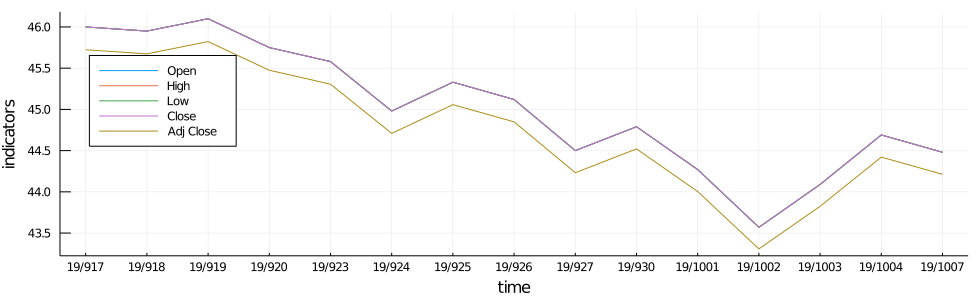

In [5]:
using Plots

rows = 1:15
gr()
plot(           dates[rows], 
               [ df[rows,2] df[rows,3] df[rows,4] df[rows,5] df[rows,6] ], 
    label    = [ columns[2] columns[3] columns[4] columns[5] columns[6]  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 300), # width, height
    layout = (1, 1)
    )

## Inspect Transaction Volumes

In [6]:
using Statistics
volumes = df[:,7]

println( "max volume ", maximum(volumes) )
println( "avg volume ", mean(volumes) ) # Statistics
println( "min volume ", minimum(volumes) )


max volume 0
avg volume 0.0
min volume 0


# Conclusions on original data

- The dataset contains bi-weekly trading history
- Displaying in the month increments is not recomended
- Volume is zero all across - dropping
- Adjusted Closing price is a good representation, leaving

# Dataset Transformation

## Quntizing (Normalizing) Data

- There are namy ways of quantizing (normalizing) data
- The most popular is to normalize data in the range of 0 to 1
- I chose to represent data as Int8 (-128,127) because of the currently available TPU (Google Coral) using TensorFlow Lite